# Inversion of ERT transects

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from resipy import Project

ERTdatadir = 'data/ERT/'

c:\Users\gmendoza\AppData\Local\anaconda3\Lib\site-packages\resipy\meshTools.py:56: UserWarning: pyvista not installed, 3D meshing viewing options will be limited
  warnings.warn('pyvista not installed, 3D meshing viewing options will be limited')


API path =  c:\Users\gmendoza\AppData\Local\anaconda3\Lib\site-packages\resipy
ResIPy version =  3.5.4
cR2.exe found and up to date.
R3t.exe found and up to date.
cR3t.exe found and up to date.


In [2]:
# Parameters
cl = 0.2 # 0.2, 0.3, 0.4
percent = 30 # 10, 20, 30

## Middelkerke

In [3]:
# reading electrode position
df = pd.read_csv(ERTdatadir + 'electrode_locations_Middelkerke.csv')
elec = np.zeros((120, 3))
elec[:, 0] = df['distance'].values
df.head()

,ID,distance,easting,northing
0,1,0.0,41665.091,204320.014
1,2,0.5,41665.283,204319.552
2,3,1.0,41665.475,204319.091
3,4,1.5,41665.667,204318.629
4,5,2.0,41665.858,204318.167


Working directory is: c:\Users\gmendoza\AppData\Local\anaconda3\Lib\site-packages\resipy
clearing dirname
filterData: 0 / 1693 quadrupoles removed.
308/1693 reciprocal measurements found.
32 measurements error > 20 %
19 measurements outside [0,6183.725257533959] removed!
filterData: 23 / 1674 quadrupoles removed.
23 measurements with greater than 30.0% reciprocal error removed!
Error model is R_err = 0.016 R_avg^0.842 (R^2 = 0.982)
Creating triangular mesh...done (29565 elements)


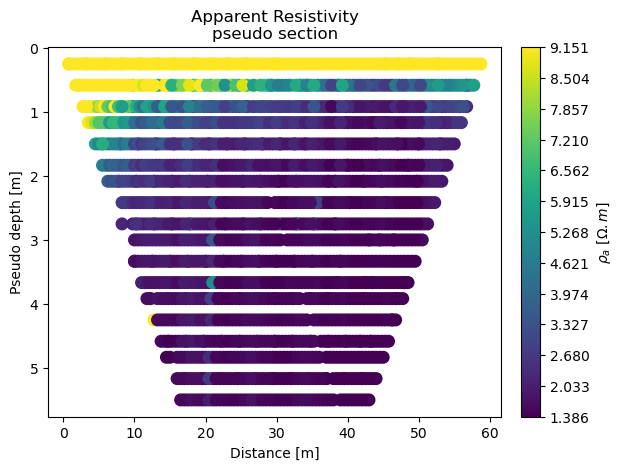

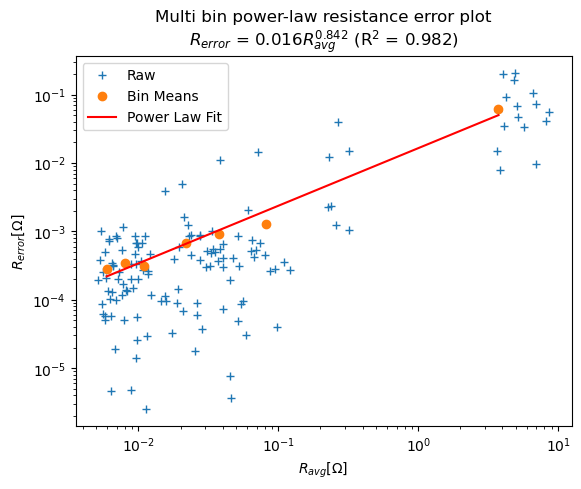

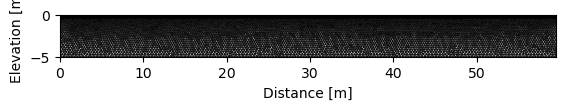

In [4]:
# invert
k = Project()
k.createSurvey(ERTdatadir + '23082301.csv', ftype='Syscal')
k.setElec(elec)
k.filterAppResist(vmin=0)
k.showPseudo()
k.filterRecip(percent=percent) 
k.fitErrorPwl()
k.createMesh('trian', cl = cl)
k.showMesh()

In [5]:
# invert
k.err = True  # use fitted error in the inversion
k.invert()

Writing .in file and protocol.dat... done

--------------------- MAIN INVERSION ------------------


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.10 <<

 >> D a t e : 15 - 04 - 2024
 >> My beautiful survey                                                             
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat                      
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<
 >> D a t a   w e i g h t   t o   b e   r e a d   f r o m   d a t a   f i l e <<


 Processing dataset   1


 Measurements read:  1510     Measurements rejected:     0
   Geometric mean of apparent resistivities:  0.24130E+01

 

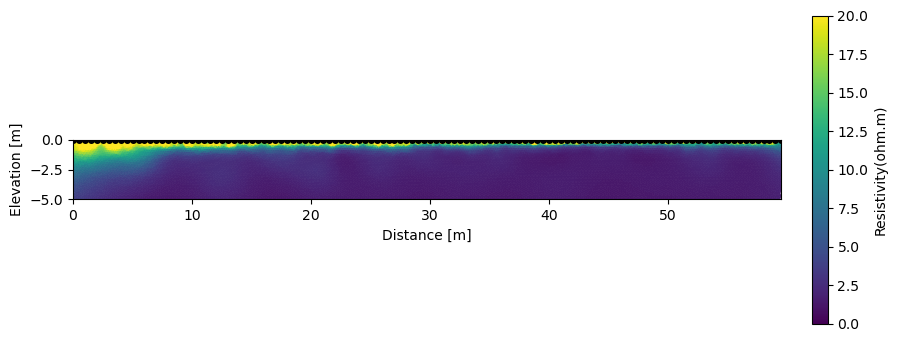

In [6]:
# inverted transect
fig, ax = plt.subplots(figsize=(10, 4))
k.showResults(ax=ax, sens=False, attr='Resistivity(ohm.m)', vmin=0, vmax=20)
fig.savefig(ERTdatadir + 'middelkerke-inv-ERT-'+str(cl)+'_'+str(percent)+'.jpg', dpi=300)

In [7]:
# extract profiles
m = k.meshResults[0]
dfs = []
for i in range(df.shape[0]):
    row = df.loc[i, :]
    ie = m.df['X'].between(row['distance'] - 0.5, row['distance'] + 0.5) & m.df['Z'].gt(-5)
    sdf = m.df[ie][['Z', 'Resistivity(ohm.m)']]
    sdf['Z'] = sdf['Z'].round(1)
    #sdf['Z'] = (sdf['Z'] * 2).round(1) / 2
    sdf = sdf.groupby('Z').mean().reset_index()
    sdf['easting'] = row['easting']
    sdf['northing'] = row['northing']
    sdf['ID'] = row['ID']
    dfs.append(sdf)
dfm = pd.concat(dfs)

print(dfm)
dfm.to_csv(ERTdatadir + 'middelkerke-inv-ERT-'+str(cl)+'_'+str(percent)+'.csv', index=False)

      Z  Resistivity(ohm.m)    easting    northing     ID
0  -4.9            3.717350  41665.091  204320.014    1.0
1  -4.8            3.795585  41665.091  204320.014    1.0
2  -4.6            3.970560  41665.091  204320.014    1.0
3  -4.5            4.058460  41665.091  204320.014    1.0
4  -4.3            4.365075  41665.091  204320.014    1.0
..  ...                 ...        ...         ...    ...
36 -0.5           10.864540  41687.911  204265.064  120.0
37 -0.4           11.032345  41687.911  204265.064  120.0
38 -0.3           13.140030  41687.911  204265.064  120.0
39 -0.2           13.273250  41687.911  204265.064  120.0
40 -0.1           13.601734  41687.911  204265.064  120.0

[5585 rows x 5 columns]


Text(0, 0.5, 'Z [m]')

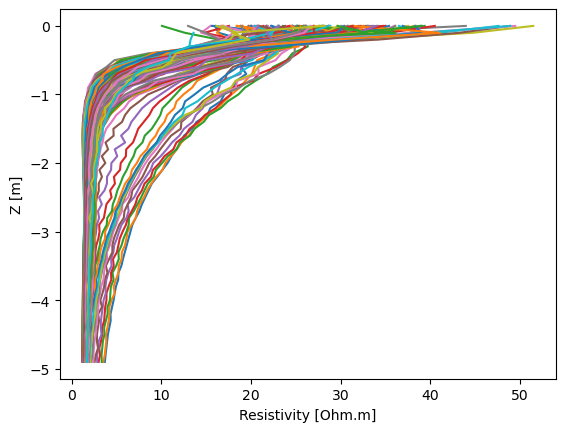

In [8]:
# figure of profiles
fig, ax = plt.subplots()
for el in dfm['ID'].unique():
    ie = dfm['ID'].eq(el)
    ax.plot(dfm[ie]['Resistivity(ohm.m)'], dfm[ie]['Z'], '-')
ax.set_xlabel('Resistivity [Ohm.m]')
ax.set_ylabel('Z [m]')
#fig.savefig(ERTdatadir + 'middelkerke-prof.jpg')

## Proefhoeve

In [ ]:
# reading electrode position
df = pd.read_csv(ERTdatadir + 'electrode_locations_Proefhoeve.csv')
df = df[:-1]
elec = np.zeros((60, 3))
elec[:, 0] = df['distance'].values
df.head()

In [ ]:
k = Project()
k.createSurvey(ERTdatadir + '23082201.csv', ftype='Syscal')
k.setElec(elec)
k.filterAppResist(vmin=0)
k.showPseudo()
k.filterRecip(percent=percent) 
k.fitErrorPwl()
k.createMesh('trian', cl=cl)
k.showMesh()

In [ ]:
# invert
k.err = True  # use fitted error in the inversion
k.invert()

In [ ]:
# inverted transect
fig, ax = plt.subplots(figsize=(10, 4))
k.showResults(ax=ax, attr='Resistivity(ohm.m)', sens=False, vmin=4, vmax=40)
fig.savefig(ERTdatadir + 'proefhoeve-inv-ERT-'+str(cl)+'_'+str(percent)+'.jpg', dpi=300)

In [ ]:
# extract profiles
m = k.meshResults[0]
dfs = []
for i in range(df.shape[0]):
    row = df.loc[i, :]
    ie = m.df['X'].between(row['distance'] - 0.5, row['distance'] + 0.5) & m.df['Z'].gt(-5)
    sdf = m.df[ie][['Z', 'Resistivity(ohm.m)']]
    sdf['Z'] = sdf['Z'].round(1)
    sdf = sdf.groupby('Z').mean().reset_index()
    sdf['easting'] = row['easting']
    sdf['northing'] = row['northing']
    sdf['ID'] = row['ID']
    dfs.append(sdf)
dfm = pd.concat(dfs)
dfm.to_csv(ERTdatadir + 'proefhoeve-inv-ERT-'+str(cl)+'_'+str(percent)+'.csv', index=False)

In [ ]:
# figure of profiles
fig, ax = plt.subplots()
for el in dfm['ID'].unique():
    ie = dfm['ID'].eq(el)
    ax.plot(dfm[ie]['Resistivity(ohm.m)'], dfm[ie]['Z'], '-')
ax.set_xlabel('Resistivity [Ohm.m]')
ax.set_ylabel('Z [m]')
#fig.savefig(datadir + 'proefhoeve-prof.jpg')